In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from glob import glob

In [3]:
malepath = glob('./data/male/*.jpg')
femalepath = glob('./data/female/*.jpg')

In [4]:
len(malepath), len(femalepath)

(7, 0)

In [5]:
# one image
path = malepath[0]
img = cv2.imread(path)

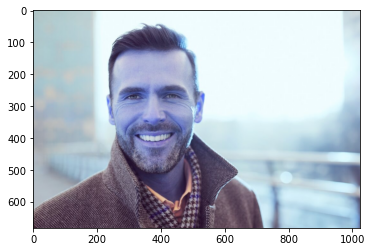

In [6]:
plt.imshow(img)
plt.show()

In [7]:
# convert image into grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(682, 1024)

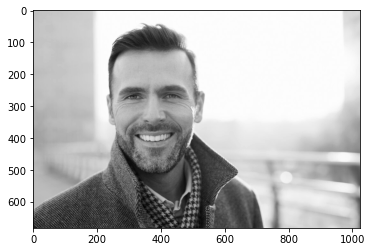

In [8]:
plt.imshow(gray,cmap='gray')

In [9]:
# load haar cascade classifier
haar = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')

In [10]:
faces = haar.detectMultiScale(gray,1.5,5)
print(faces)

[[236 166 273 273]
 [171 112 410 410]]


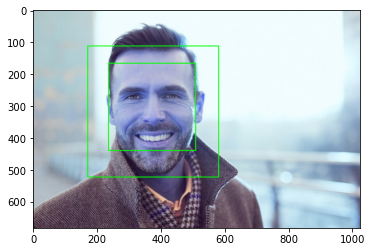

In [11]:
for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img)

In [12]:
# crop the image
crop_img = img[y:y+h,x:x+h]

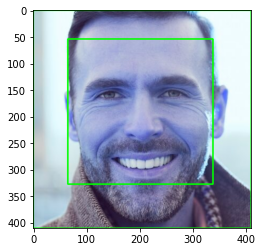

In [13]:
plt.imshow(crop_img)

In [14]:
# save the image
cv2.imwrite('./data/m_01.png',crop_img)

True

In [15]:
# Apply to all the images
def extract_images(path,gender,i):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = haar.detectMultiScale(gray,1.5,5)
    for x,y,w,h in faces:
        roi = img[y:y+h,x:x+w]
        if gender == 'male':
            cv2.imwrite('./data/crop/male_crop/{}_{}.png'.format(gender,i),roi)
        else:
            cv2.imwrite('./data/crop/female_crop/{}_{}.png'.format(gender,i),roi)

In [16]:
for i,path in enumerate(femalepath):
    try:

        extract_images(path,'female',i)
        print('INFO: {}/{} processed sucessfully'.format(i,len(femalepath)))
        
    except:
        print('INFO: {}/{} cannot be processed'.format(i,len(femalepath)))

In [17]:
for i,path in enumerate(malepath):
    try:

        extract_images(path,'male',i)
        print('INFO: {}/{} processed sucessfully'.format(i,len(malepath)))
        
    except:
        print('INFO: {}/{} cannot be processed'.format(i,len(malepath)))

INFO: 0/7 processed sucessfully
INFO: 1/7 processed sucessfully
INFO: 2/7 processed sucessfully
INFO: 3/7 processed sucessfully
INFO: 4/7 processed sucessfully
INFO: 5/7 processed sucessfully
INFO: 6/7 processed sucessfully
